In [1]:
from csv import reader, DictReader

In [2]:
csv_file = "results/results.csv"

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import itertools

In [102]:
def strip_cols(df, toStrip=" "):
    newcols = []
    for i, col in enumerate(df.columns):
        newcol = col.strip(toStrip)
        newcols.append(newcol)
    df.columns = newcols

In [103]:
### LEGACY CODE ###
def get_merged_csv_old(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], axis=0, ignore_index=True)

def eval_csv_old(file, dsp=False):
    df = pd.read_csv(file, delimiter=";")
    strip_cols(df, toStrip=" ")
    param_cols = df.columns[0:5]
    result_cols = df.columns[5:]
    
    new_result_cols = [pair[0]+pair[1] for pair in itertools.product(result_cols, ["_mean", "_std", "_min", "_max"])]
    #means = df[result_cols].mean()
    #std = df[result_cols].std()
    #mins = df[result_cols].min()
    #maxs = df[result_cols].max()
    #for col in new_result_cols:
    stats = df.loc[:,param_cols].describe()
    params = df.loc[0,param_cols]
    
    analysis = [params, stats]
        
    if print:
        #display(df.head())
        #print("Param columns:",param_cols)
        #print("Result columns:",result_cols)
        #print("New result columns:", new_result_cols)
        print("Params:")
        display(params)
        print("Stats")
        display(stats)
    
    return analysis, df

In [104]:
path = os.getcwd()
fmask = os.path.join(path, 'results/*.csv')
print(fmask)
df = get_merged_csv(glob.glob(fmask), delimiter=";")
strip_cols(df)
df

/Users/peterholzner/Code/amp/project/Code/results/*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
0,Taubenfeld_Paper_1_atomic,6,150,10,3600,0,0,0,0,0,...,2.43453,2.43453,6.31453,1.01866,3.41538,6.63666,187.857,0,187.857,187.857
1,Taubenfeld_Paper_1_atomic,7,100,10,2800,0,0,0,0,0,...,3.494,3.494,1.69918,1.44968,1.24075,5.82504,124.987,0,124.987,124.987
2,Lamport_Lecture_atomic,2,1000,10,8000,0,0,0,0,0,...,0.125868,0.125868,0.134823,0.00455589,0.133382,0.147789,5.48021,0,5.48021,5.48021
3,Taubenfeld_Paper_1_atomic,5,200,10,4000,0,0,0,0,0,...,3.57373,3.57373,2.98047,0.316585,2.88036,3.88149,134.358,2.99591e-14,134.358,134.358
4,Taubenfeld_Paper_1_atomic,4,500,10,8000,0,0,0,0,0,...,0.1006,0.1006,0.0937681,7.97526e-05,0.0935411,0.0937933,5.52981,9.36222e-16,5.52981,5.52981
5,Lamport_Lecture_atomic,3,680,10,8160,0,0,0,0,0,...,0.102196,0.102196,0.133054,0.0125383,0.0973693,0.137019,5.9272,0,5.9272,5.9272
6,Lamport_Lecture_atomic,6,150,10,3600,0,0,0,0,0,...,0.0500474,0.0500474,3.42044,1.10716,3.07033,6.57148,191.907,2.99591e-14,191.907,191.907
7,Lamport_Lecture_atomic,4,500,10,8000,0,0,0,0,0,...,0.100369,0.100369,0.0977802,0.000886418,0.0974999,0.100303,5.4374,9.36222e-16,5.4374,5.4374
8,Taubenfeld_Paper_1_atomic,3,680,10,8160,0,0,0,0,0,...,0.102099,0.102099,0.100399,0.00254238,0.0931633,0.101203,5.61829,9.36222e-16,5.61829,5.61829
9,Taubenfeld_Paper_1_atomic,2,1000,10,8000,0,0,0,0,0,...,0.0897782,0.0897782,0.0904701,0.00201949,0.0898315,0.0962177,4.58296,0,4.58296,4.58296


In [196]:
def eval_csv(file, idxResults=5, dsp=False, ret_orig=False):
    """
    Reads a csv in our benchmark_format and evaluates it.
    
    Evaluation is done on a per-column-basis (only for results, not parameters).
    The columns [0, idxResult) are considered as parameters, the rest as results.
    Evaluations performed: mean, std, min, max
    """
    df = pd.read_csv(file, delimiter=";")
    param_cols = df.columns[0:idxResults]
    result_cols = df.columns[idxResults:]
    
    new_result_cols = [pair[0]+pair[1] for pair in itertools.product(result_cols, [":mean", ":std", ":min", ":max"])]
    stats_dict = {
        "mean": df[result_cols].mean(),    
        "std": df[result_cols].std(),
        "min": df[result_cols].min(),
        "max": df[result_cols].max()
    }
    stats = pd.DataFrame(columns=new_result_cols)
    for col in stats.columns:
        res, stat = col.split(":")
        stats.loc[0,col] = stats_dict[stat][res]
        
    params = df.loc[0,param_cols].to_frame().T
    analysis = pd.concat([params, stats], axis=1)
        
    if dsp:
        #display(df.head())
        #print("Param columns:",param_cols)
        #print("Result columns:",result_cols)
        #print("New result columns:", new_result_cols)
        print("Params:")
        display(params)
        print("Stats")
        display(stats)
    
    if ret_orig:
        return analysis, df
    else:
        return analysis

def get_cols(file, idxResults=5, dsp=False):
    df_csv = pd.read_csv(file, delimiter=";")
    param_cols = df_csv.columns[0:idxResults]
    result_cols = df_csv.columns[idxResults:]
    return param_cols, result_cols
    
def get_merged_csv(flist, **kwargs):
    return pd.concat([eval_csv(f) for f in flist], axis=0, ignore_index=True), get_cols(flist[0])

In [197]:
path = os.getcwd()
lock = "Taubenfeld"
fmask = os.path.join(path, f"results/*_{lock}_*.csv") # File name mask for filtering
print("File mask:", fmask)

# Evaluate and merge evaluations into 1 DataFrame
df, (param_cols, result_cols) = get_merged_csv(glob.glob(fmask), delimiter=";")
df

File mask: /Users/peterholzner/Code/amp/project/Code/results/*_Taubenfeld_*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
0,Taubenfeld_Paper_1_atomic,6,150,10,3600,0,0,0,0,0,...,2.43453,2.43453,6.31453,1.01866,3.41538,6.63666,187.857,0,187.857,187.857
1,Taubenfeld_Paper_1_atomic,7,100,10,2800,0,0,0,0,0,...,3.494,3.494,1.69918,1.44968,1.24075,5.82504,124.987,0,124.987,124.987
2,Taubenfeld_Paper_1_atomic,5,200,10,4000,0,0,0,0,0,...,3.57373,3.57373,2.98047,0.316585,2.88036,3.88149,134.358,2.99591e-14,134.358,134.358
3,Taubenfeld_Paper_1_atomic,4,500,10,8000,0,0,0,0,0,...,0.1006,0.1006,0.0937681,7.97526e-05,0.0935411,0.0937933,5.52981,9.36222e-16,5.52981,5.52981
4,Taubenfeld_Paper_1_atomic,3,680,10,8160,0,0,0,0,0,...,0.102099,0.102099,0.100399,0.00254238,0.0931633,0.101203,5.61829,9.36222e-16,5.61829,5.61829
5,Taubenfeld_Paper_1_atomic,2,1000,10,8000,0,0,0,0,0,...,0.0897782,0.0897782,0.0904701,0.00201949,0.0898315,0.0962177,4.58296,0,4.58296,4.58296
6,Taubenfeld_Paper_1_atomic,8,50,10,1600,0,0,0,0,0,...,0.153502,0.153502,0.182575,0.0533828,0.0306447,0.199456,40.4512,7.48978e-15,40.4512,40.4512


In [198]:
path = os.getcwd()
lock = "Lamport"
fmask = os.path.join(path, f"results/*_{lock}_*.csv")
print(fmask)
df, (param_cols, result_cols) = get_merged_csv(glob.glob(fmask), delimiter=";")
df

/Users/peterholzner/Code/amp/project/Code/results/*_Lamport_*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
0,Lamport_Lecture_atomic,2,1000,10,8000,0,0,0,0,0,...,0.125868,0.125868,0.134823,0.00455589,0.133382,0.147789,5.48021,0,5.48021,5.48021
1,Lamport_Lecture_atomic,3,680,10,8160,0,0,0,0,0,...,0.102196,0.102196,0.133054,0.0125383,0.0973693,0.137019,5.9272,0,5.9272,5.9272
2,Lamport_Lecture_atomic,7,100,10,2800,0,0,0,0,0,...,0.0394395,0.0394395,4.19782,1.46378,0.0318197,4.66071,123.623,2.99591e-14,123.623,123.623
3,Lamport_Lecture_atomic,6,150,10,3600,0,0,0,0,0,...,0.0500474,0.0500474,3.42044,1.10716,3.07033,6.57148,191.907,2.99591e-14,191.907,191.907
4,Lamport_Lecture_atomic,4,500,10,8000,0,0,0,0,0,...,0.100369,0.100369,0.0977802,0.000886418,0.0974999,0.100303,5.4374,9.36222e-16,5.4374,5.4374
5,Lamport_Lecture_atomic,5,200,10,4000,0,0,0,0,0,...,3.67256,3.67256,2.63001,0.108773,2.59561,2.93958,151.931,0,151.931,151.931
6,Lamport_Lecture_atomic,8,50,10,1600,0,0,0,0,0,...,1.26081,1.26081,0.101652,0.2633,0.018389,0.851018,53.5679,7.48978e-15,53.5679,53.5679


In [207]:
path = os.getcwd()
fmask = os.path.join(path, f"results/*.csv")
print(fmask)
df, (param_cols, result_cols) = get_merged_csv(glob.glob(fmask), delimiter=";")
df = df.sort_values(["lock_name", "num_threads"])
df

/Users/peterholzner/Code/amp/project/Code/results/*.csv


,lock_name,num_threads,num_turns,num_tests,num_events,mutex_fail_count:mean,mutex_fail_count:std,mutex_fail_count:min,mutex_fail_count:max,fcfs_fail_count:mean,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
15,Aravind_fix,2,1000,10,8000,0,0,0,0,0.1,...,0.0903105,0.0903105,0.0881382,0.000608074,0.0879459,0.0898688,4.49416,0,4.49416,4.49416
14,Aravind_fix,3,680,10,8160,0,0,0,0,3.6,...,0.0931532,0.0931532,0.0918557,0.00232968,0.091119,0.0984861,4.88509,9.36222e-16,4.88509,4.88509
20,Aravind_fix,4,500,10,8000,0,0,0,0,6.5,...,0.0987791,0.0987791,0.108816,0.0477321,0.0937219,0.244664,5.71511,9.36222e-16,5.71511,5.71511
19,Aravind_fix,5,200,10,4000,0,0,0,0,5.9,...,2.44415,2.44415,3.34305,0.1583,3.29299,3.79358,121.69,2.99591e-14,121.69,121.69
16,Aravind_fix,6,150,10,3600,0,0,0,0,10,...,5.74581,5.74581,4.80152,0.481425,3.43136,4.95376,204.131,2.99591e-14,204.131,204.131
17,Aravind_fix,7,100,10,2800,0,0,0,0,14.6,...,3.88234,3.88234,5.57021,1.94255,0.0416249,6.1845,160.3,2.99591e-14,160.3,160.3
1,Aravind_fix,8,50,10,1600,0,0,0,0,13.7,...,0.0185904,0.0185904,0.0247895,0.0019467,0.0192491,0.0254051,65.1776,0,65.1776,65.1776
3,Lamport_Lecture_atomic,2,1000,10,8000,0,0,0,0,0,...,0.125868,0.125868,0.134823,0.00455589,0.133382,0.147789,5.48021,0,5.48021,5.48021
6,Lamport_Lecture_atomic,3,680,10,8160,0,0,0,0,0,...,0.102196,0.102196,0.133054,0.0125383,0.0973693,0.137019,5.9272,0,5.9272,5.9272
9,Lamport_Lecture_atomic,4,500,10,8000,0,0,0,0,0,...,0.100369,0.100369,0.0977802,0.000886418,0.0974999,0.100303,5.4374,9.36222e-16,5.4374,5.4374


In [208]:
df.iloc[:,15:]

,lru_fail_count:min,lru_fail_count:max,thp_runtime_wanc:mean,thp_runtime_wanc:std,thp_runtime_wanc:min,thp_runtime_wanc:max,thp_wanc:mean,thp_wanc:std,thp_wanc:min,thp_wanc:max,...,thp_runtime_ref:min,thp_runtime_ref:max,thp_ref:mean,thp_ref:std,thp_ref:min,thp_ref:max,bm_runtime:mean,bm_runtime:std,bm_runtime:min,bm_runtime:max
15,0,0,0.098544,1.46285e-17,0.098544,0.098544,0.0808819,0.028419,0,0.0898688,...,0.0903105,0.0903105,0.0881382,0.000608074,0.0879459,0.0898688,4.49416,0,4.49416,4.49416
14,0,0,0.094455,1.46285e-17,0.094455,0.094455,0.0886375,0.031144,0,0.0984861,...,0.0931532,0.0931532,0.0918557,0.00232968,0.091119,0.0984861,4.88509,9.36222e-16,4.88509,4.88509
20,0,0,0.100479,1.46285e-17,0.100479,0.100479,0.220198,0.0773696,0,0.244664,...,0.0987791,0.0987791,0.108816,0.0477321,0.0937219,0.244664,5.71511,9.36222e-16,5.71511,5.71511
19,0,0,2.72241,0,2.72241,2.72241,3.41422,1.19964,0,3.79358,...,2.44415,2.44415,3.34305,0.1583,3.29299,3.79358,121.69,2.99591e-14,121.69,121.69
16,0,0,3.40952,0,3.40952,3.40952,3.08822,1.08509,0,3.43136,...,5.74581,5.74581,4.80152,0.481425,3.43136,4.95376,204.131,2.99591e-14,204.131,204.131
17,0,0,4.11852,9.36222e-16,4.11852,4.11852,0.0374624,0.0131629,0,0.0416249,...,3.88234,3.88234,5.57021,1.94255,0.0416249,6.1845,160.3,2.99591e-14,160.3,160.3
1,0,0,2.06168,4.68111e-16,2.06168,2.06168,0.0173242,0.0060871,0,0.0192491,...,0.0185904,0.0185904,0.0247895,0.0019467,0.0192491,0.0254051,65.1776,0,65.1776,65.1776
3,0,0,0.124759,0,0.124759,0.124759,0.13301,0.046735,0,0.147789,...,0.125868,0.125868,0.134823,0.00455589,0.133382,0.147789,5.48021,0,5.48021,5.48021
6,0,2,0.0928372,1.46285e-17,0.0928372,0.0928372,0.0876324,0.0307909,0,0.0973693,...,0.102196,0.102196,0.133054,0.0125383,0.0973693,0.137019,5.9272,0,5.9272,5.9272
9,0,2,0.104418,0,0.104418,0.104418,0.0902727,0.0317186,0,0.100303,...,0.100369,0.100369,0.0977802,0.000886418,0.0974999,0.100303,5.4374,9.36222e-16,5.4374,5.4374


In [201]:
param_cols, result_cols

(Index(['lock_name', 'num_threads', 'num_turns', 'num_tests', 'num_events'], dtype='object'),
 Index(['mutex_fail_count', 'fcfs_fail_count', 'lru_fail_count',
        'thp_runtime_wanc', 'thp_wanc', 'anc', 'thp_runtime_ref', 'thp_ref',
        'bm_runtime'],
       dtype='object'))

# Actual evaluation

In [125]:
import matplotlib as mpl

#mpl.style.use("classic")
mpl.style.use("seaborn")

In [110]:
def plot_col_old(df, x_col="num_threads", y_col="mutex_fail_count", title=None, norm=False):
    
    if not title:
        title = y_col + " over " + x_col
    locks = df["lock_name"].unique()
    plt.figure(figsize=(14,8))

    for lock in locks:
        x, y = df[df["lock_name"]==lock][x_col], df[df["lock_name"]==lock][y_col]
        if norm:
            y /= df[df["lock_name"]==lock]["num_events"]*4
        plt.plot(x, y, label=lock, marker="x", linewidth=2)
    plt.grid(True)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    xticks = np.arange(x.min(), x.max()+1, 1)
    plt.xticks(ticks=xticks);
    plt.suptitle(title, fontsize=28, fontweight="bold");

In [248]:
lstyle_rotation = ['-', '--', '-.', ':']
def plot_col(df, x_col="num_threads", y_col="mutex_fail_count", title=None, norm=False, **kwargs):
    
    if not title:
        title = y_col + " over " + x_col
    locks = df["lock_name"].unique()
    print("locks:", locks)
    fig, ax = plt.subplots(figsize=(14,8))

    for lock, lstyle in zip(locks, lstyle_rotation):
        x, y, yerr = df[df["lock_name"]==lock][x_col],\
                     df[df["lock_name"]==lock][y_col+":mean"],\
                     df[df["lock_name"]==lock][y_col+":std"]
        if norm:
            y /= df[df["lock_name"]==lock]["num_events"]*4
        plt.errorbar(x, y, yerr=yerr, label=lock, marker="o", linewidth=2, ls=lstyle, capsize=5, capthick=2, **kwargs)
        #sns.pointplot(x="time", y="total_bill", dodge=True,)
    text = df[df["lock_name"]==lock].loc[0,param_cols[2:]].to_string()
    #text = "a"
    plt.figtext(0.35, 0.85, text, fontsize=14, verticalalignment='top', )
    plt.grid(True)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    xticks = np.arange(x.min(), x.max()+1, 1)
    plt.xticks(ticks=xticks);
    plt.suptitle(title, fontsize=28, fontweight="bold");

# Mutex failures over nthreads

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


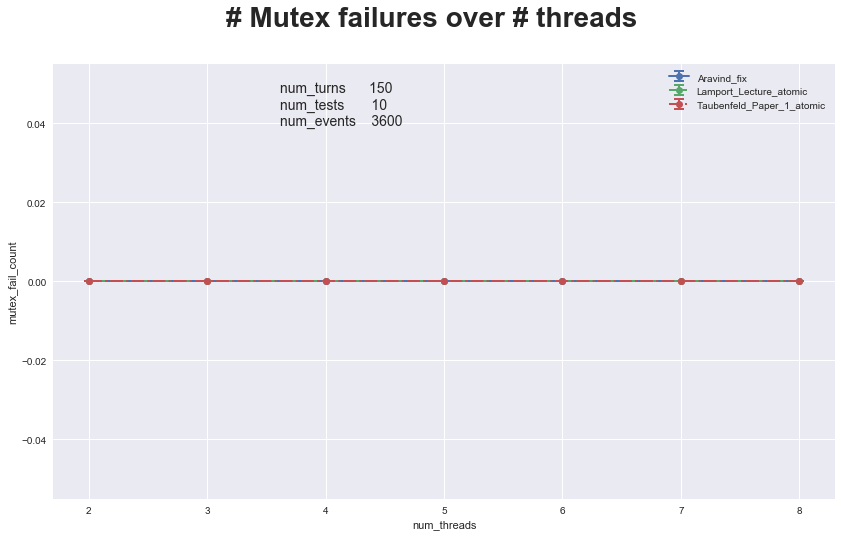

In [249]:
plot_col(df, x_col="num_threads", y_col="mutex_fail_count", title="# Mutex failures over # threads", norm=False)
#plt.set_cmap("gist_ncar");

# FCFS failures over nthreads

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


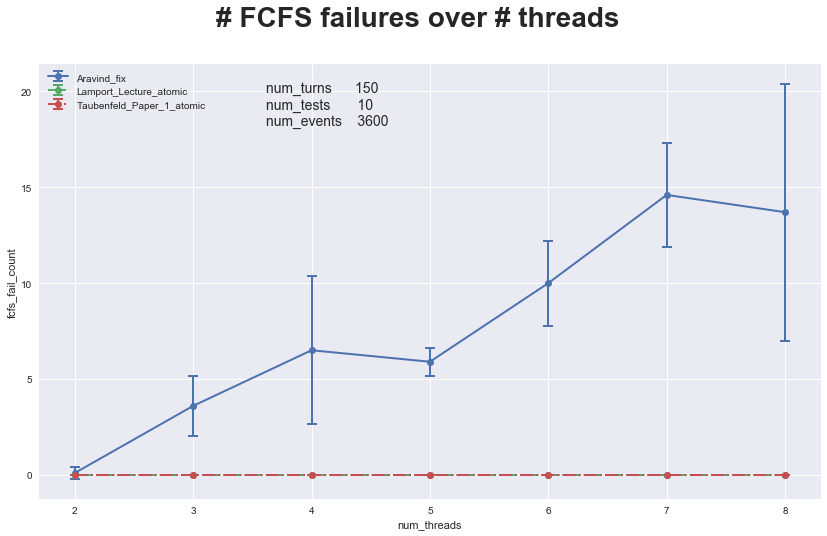

In [250]:
plot_col(df, x_col="num_threads", y_col="fcfs_fail_count", title="# FCFS failures over # threads", norm=False)
plt.savefig("plots/fcfs_fails.png")
plt.show()

# LRU failures over nthreads

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


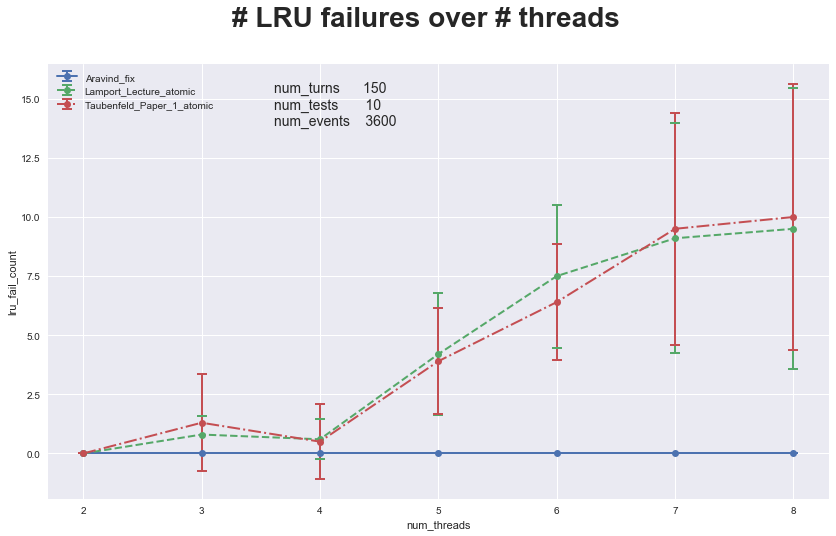

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


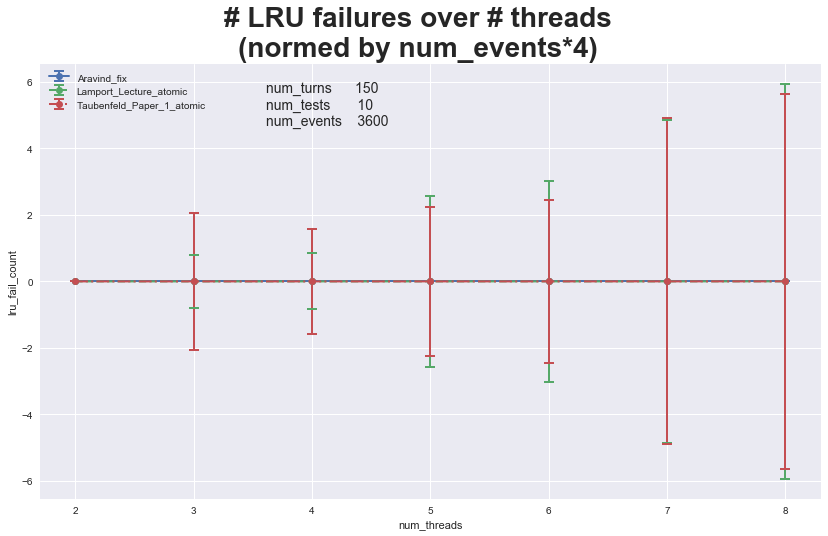

In [251]:
plot_col(df, x_col="num_threads", y_col="lru_fail_count", title="# LRU failures over # threads",\
         norm=False)
plt.savefig("plots/lru_fails.png")
plt.show()
plot_col(df, x_col="num_threads", y_col="lru_fail_count", title="# LRU failures over # threads\n(normed by num_events*4)", norm=True)
plt.savefig("plots/lru_fails_normed.png")
plt.show()

In [252]:
result_cols

Index(['mutex_fail_count', 'fcfs_fail_count', 'lru_fail_count',
       'thp_runtime_wanc', 'thp_wanc', 'anc', 'thp_runtime_ref', 'thp_ref',
       'bm_runtime'],
      dtype='object')

# Runtime (of throughput test)

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


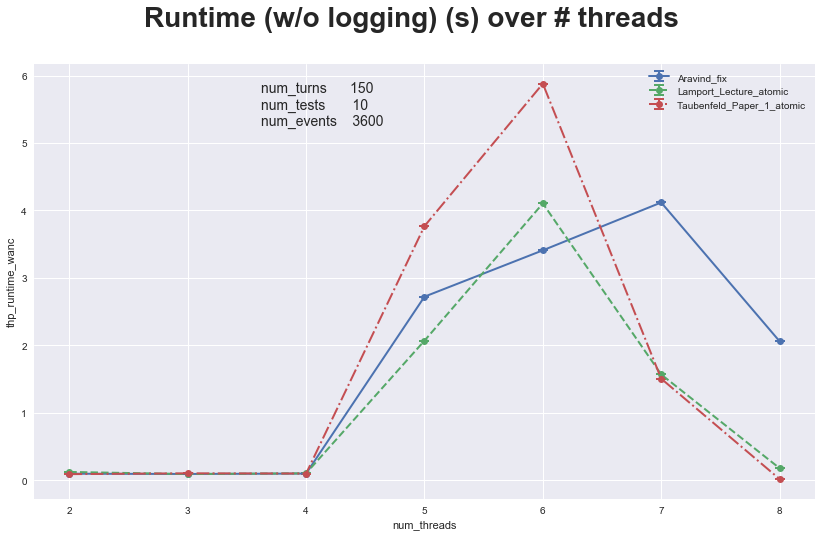

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


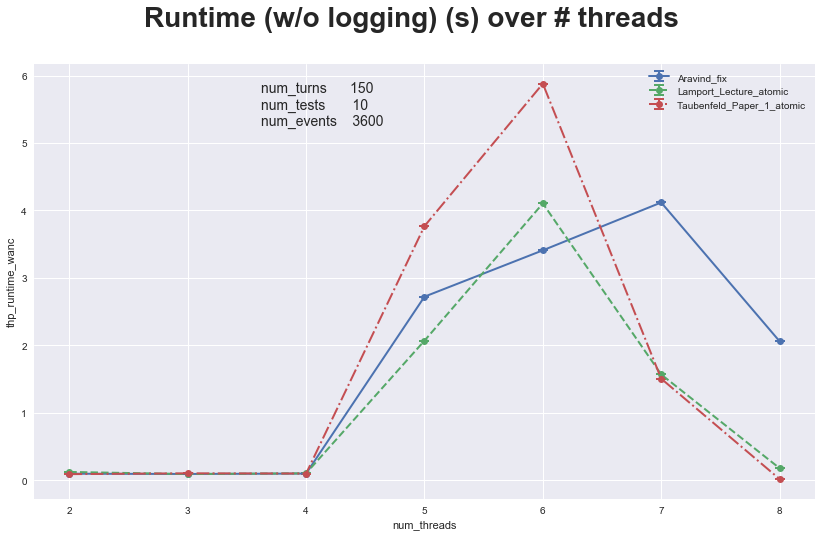

In [253]:
plot_col(df, x_col="num_threads", y_col="thp_runtime_wanc", title="Runtime (w/o logging) (s) over # threads", norm=False)
plt.savefig("plots/runtime.png")
plt.show()
plot_col(df, x_col="num_threads", y_col="thp_runtime_wanc", title="Runtime (w/o logging) (s) over # threads", norm=False)
plt.savefig("plots/runtime_ref.png")
plt.show()

# Throughput

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


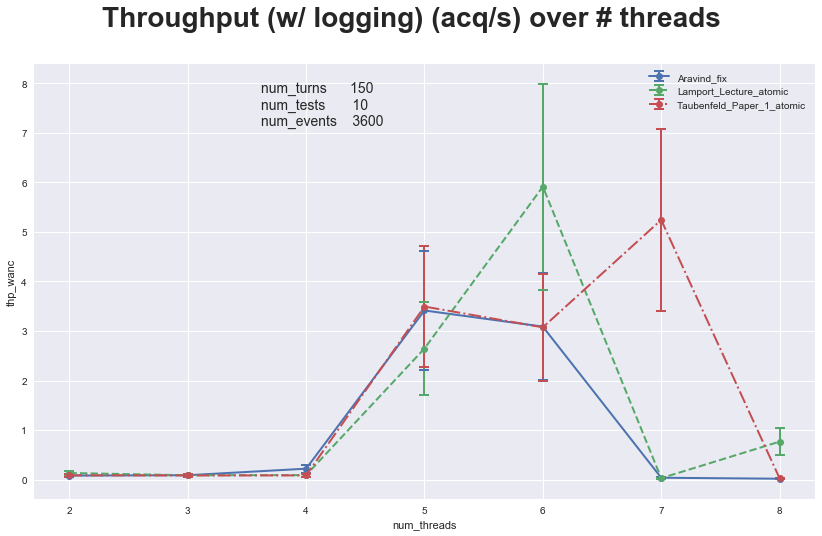

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


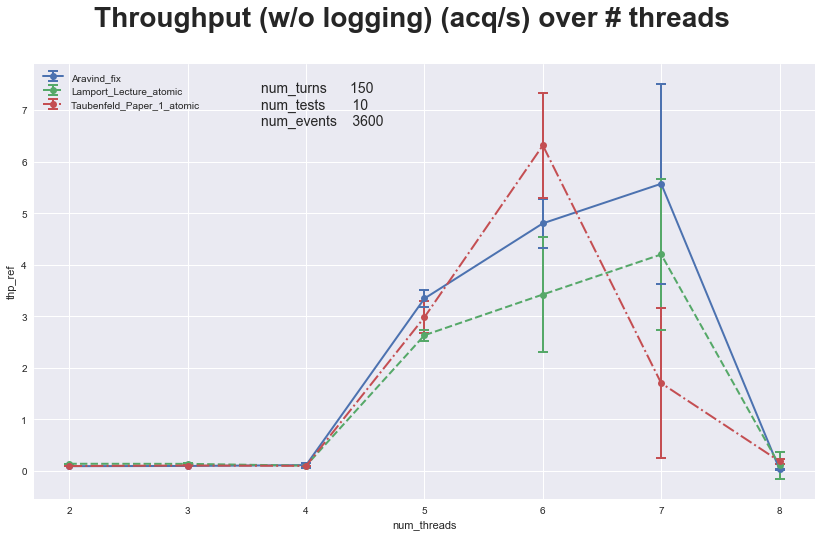

In [254]:
plot_col(df, x_col="num_threads", y_col="thp_wanc", title="Throughput (w/ logging) (acq/s) over # threads", norm=False)
plt.savefig("plots/throughput.png")
plt.show()
plot_col(df, x_col="num_threads", y_col="thp_ref", title="Throughput (w/o logging) (acq/s) over # threads", norm=False)
plt.savefig("plots/throughput_ref.png")
plt.show()

# Average number of contenders

locks: ['Aravind_fix' 'Lamport_Lecture_atomic' 'Taubenfeld_Paper_1_atomic']


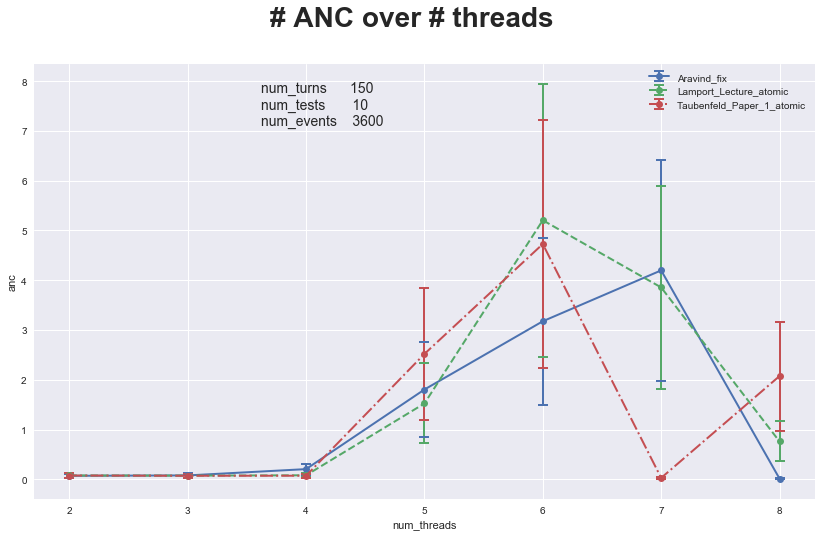

In [255]:
plot_col(df, x_col="num_threads", y_col="anc", title="# ANC over # threads", norm=False)
plt.savefig("plots/anc.png")
plt.show()